In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class FashionMNIST_nolabel(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        fashion_df = pd.read_csv("../input/fashion-mnist_train.csv")
        self.labels = fashion_df.label.values
        self.images = fashion_df.iloc[:,1:].values.astype('uint8').reshape(-1, 28, 28)
        
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.fromarray(self.images[idx])
        #img = self.images[idx]
        if self.transform:
            img = self.transform(img)
        return img

In [3]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
dataset = FashionMNIST_nolabel(transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.z_dim = 100
        self.model = nn.Sequential(
            nn.Linear(self.z_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    
    def forward(self, z):
        out = self.model(z)
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
                nn.Linear(784, 1024),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(1024, 512),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(512, 256),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(256, 128),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Linear(128, 1),
                nn.Sigmoid()
        )
        
    def forward(self, x):
        x = x.view(x.size(0), 784)
        out = self.model(x)
        return out

In [5]:
def generator_step(batch_size):
    g_optimizer.zero_grad()
    z = Variable(torch.randn(batch_size, 100)).to(device)
    
    fake_images = generator(z)
    validity = discriminator(fake_images)
    g_loss = criterion(validity, Variable(torch.ones(batch_size)).to(device))
    g_loss.backward()
    g_optimizer.step()
    return g_loss.data

def discriminator_step(batch_size, real_images):
    d_optimizer.zero_grad()

    
    # real loss
    real_validity = discriminator(real_images)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).to(device))
    
    # fake loss
    z = Variable(torch.randn(batch_size, 100)).to(device)
    fake_images = generator(z)
    validity = discriminator(fake_images)
    fake_loss = criterion(validity, Variable(torch.zeros(batch_size)).to(device))
    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss.data

In [6]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)


criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)

Epoch:  1


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


g_loss: 3.125903606414795 d_loss: 0.5392680764198303


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


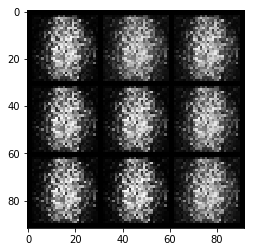

Epoch:  2
g_loss: 2.011004686355591 d_loss: 0.4759877026081085


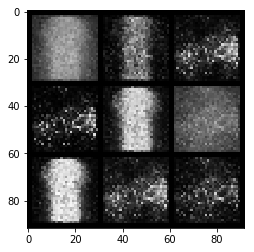

Epoch:  3
g_loss: 2.975410223007202 d_loss: 0.5715978145599365


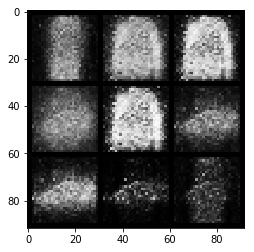

Epoch:  4
g_loss: 1.9340860843658447 d_loss: 0.8982388973236084


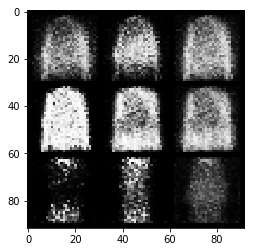

Epoch:  5
g_loss: 1.5189827680587769 d_loss: 0.907764196395874


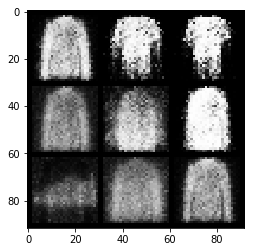

Epoch:  6
g_loss: 2.44559383392334 d_loss: 0.5530036687850952


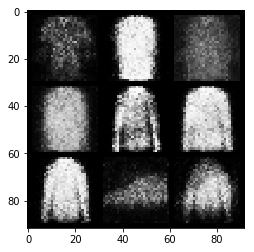

Epoch:  7
g_loss: 1.4353392124176025 d_loss: 0.8501973748207092


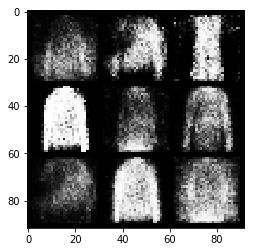

Epoch:  8
g_loss: 1.8168563842773438 d_loss: 0.8522776961326599


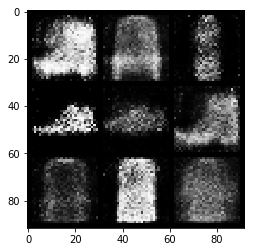

Epoch:  9
g_loss: 1.7456016540527344 d_loss: 0.6955103874206543


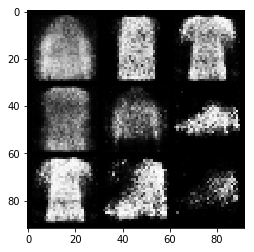

Epoch:  10
g_loss: 1.3829017877578735 d_loss: 0.8238592147827148


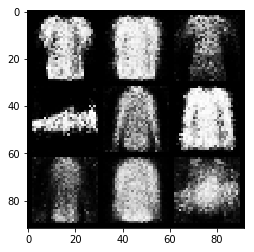

Epoch:  11
g_loss: 1.7488020658493042 d_loss: 1.068577527999878


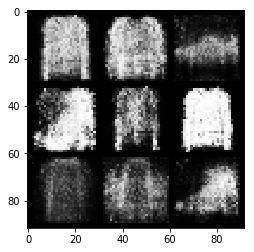

Epoch:  12
g_loss: 1.9090591669082642 d_loss: 1.1501792669296265


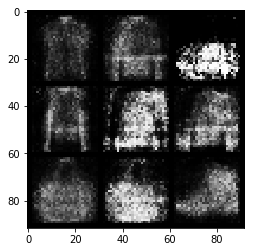

Epoch:  13
g_loss: 1.9335148334503174 d_loss: 0.9281810522079468


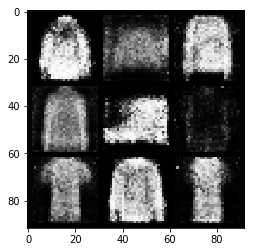

Epoch:  14
g_loss: 1.3315318822860718 d_loss: 1.0049314498901367


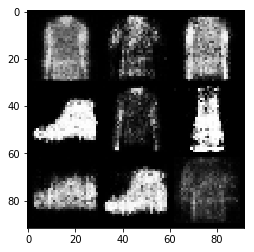

Epoch:  15
g_loss: 1.41685152053833 d_loss: 0.8106475472450256


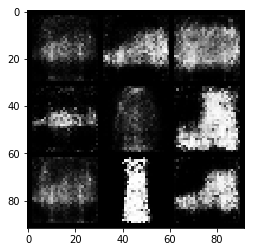

Epoch:  16
g_loss: 1.6311078071594238 d_loss: 0.9184553027153015


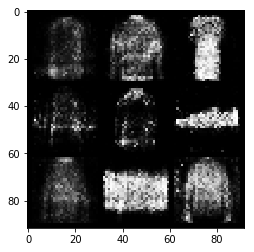

Epoch:  17
g_loss: 1.560516595840454 d_loss: 0.8025557398796082


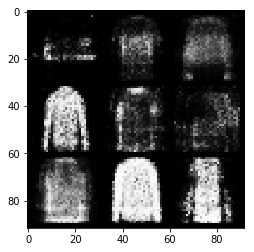

Epoch:  18
g_loss: 1.329694390296936 d_loss: 0.8932685852050781


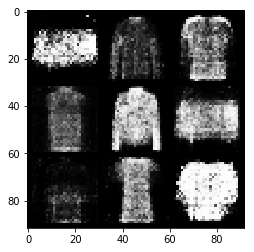

Epoch:  19
g_loss: 1.4833807945251465 d_loss: 0.7541573643684387


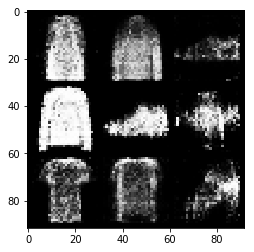

Epoch:  20
g_loss: 1.127134919166565 d_loss: 1.022932767868042


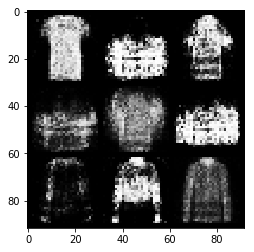

Epoch:  21
g_loss: 1.6717778444290161 d_loss: 0.9359819293022156


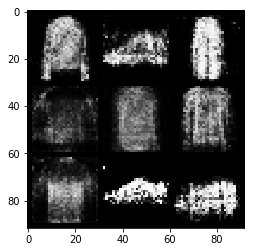

Epoch:  22
g_loss: 1.497564435005188 d_loss: 0.9484156370162964


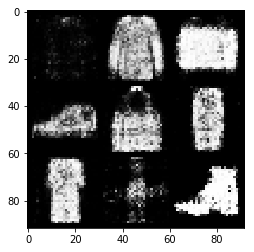

Epoch:  23
g_loss: 1.3936693668365479 d_loss: 0.9147944450378418


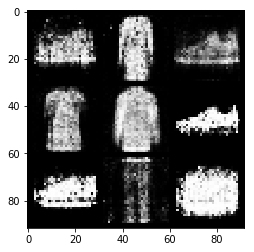

Epoch:  24
g_loss: 1.4607491493225098 d_loss: 1.1710861921310425


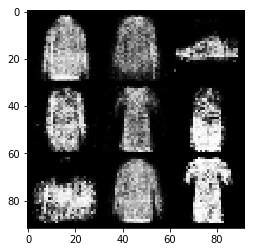

Epoch:  25
g_loss: 1.310335397720337 d_loss: 1.1612191200256348


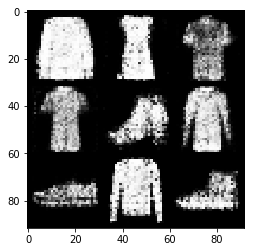

Epoch:  26
g_loss: 1.4512228965759277 d_loss: 0.8159174919128418


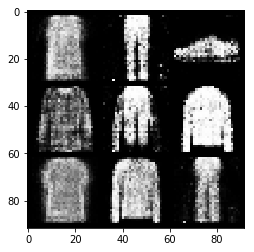

Epoch:  27
g_loss: 1.0392155647277832 d_loss: 0.8054797053337097


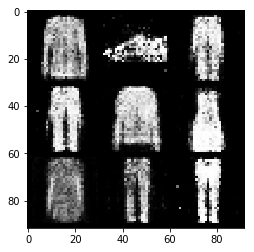

Epoch:  28
g_loss: 1.5462580919265747 d_loss: 0.8519306182861328


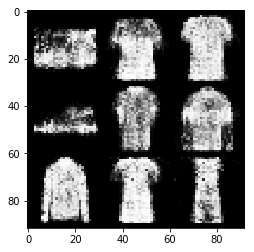

Epoch:  29
g_loss: 1.449094295501709 d_loss: 1.058610200881958


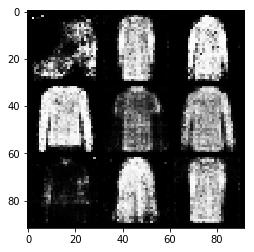

Epoch:  30
g_loss: 1.416039228439331 d_loss: 0.9196536540985107


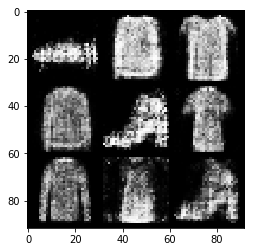

Epoch:  31
g_loss: 1.1361539363861084 d_loss: 1.1528559923171997


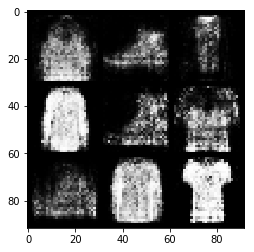

Epoch:  32
g_loss: 1.2020668983459473 d_loss: 0.9787008762359619


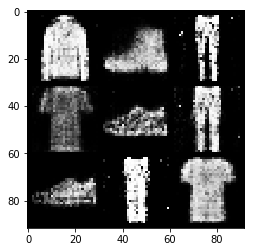

Epoch:  33
g_loss: 1.1374520063400269 d_loss: 1.1814372539520264


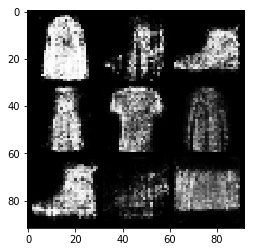

Epoch:  34
g_loss: 1.2632145881652832 d_loss: 1.077521800994873


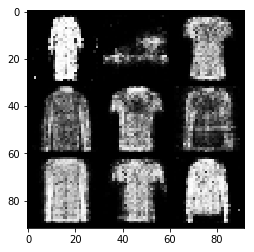

Epoch:  35
g_loss: 1.0731720924377441 d_loss: 1.280790090560913


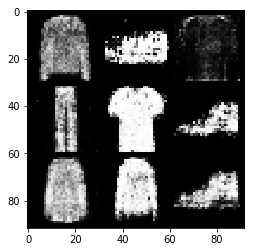

Epoch:  36
g_loss: 1.1798542737960815 d_loss: 1.1095094680786133


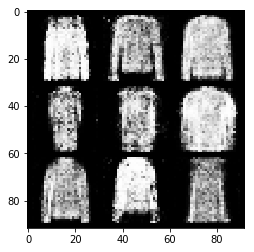

Epoch:  37
g_loss: 1.0996694564819336 d_loss: 1.1574453115463257


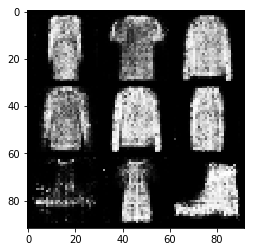

Epoch:  38
g_loss: 0.9905638694763184 d_loss: 0.9405562877655029


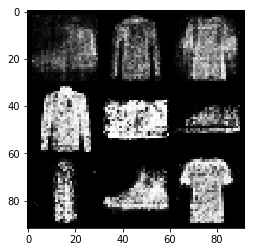

Epoch:  39
g_loss: 1.1087772846221924 d_loss: 1.0559293031692505


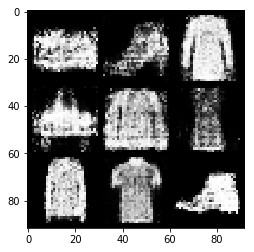

Epoch:  40
g_loss: 1.2773641347885132 d_loss: 0.8676697015762329


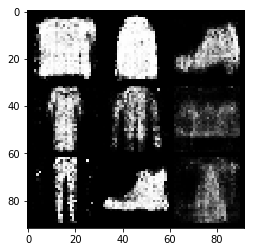

Epoch:  41
g_loss: 1.1696577072143555 d_loss: 1.067446231842041


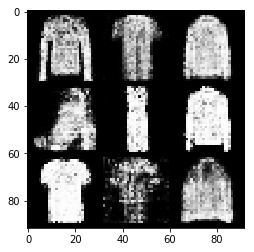

Epoch:  42
g_loss: 1.216200590133667 d_loss: 1.1175490617752075


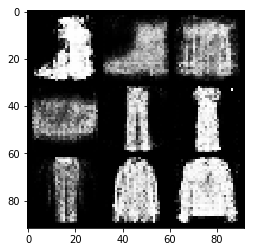

Epoch:  43
g_loss: 0.960641086101532 d_loss: 1.1775375604629517


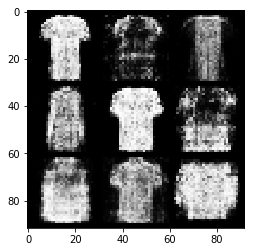

Epoch:  44
g_loss: 0.9233032464981079 d_loss: 1.189436912536621


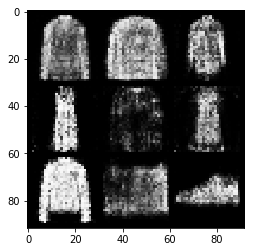

Epoch:  45
g_loss: 1.1851396560668945 d_loss: 1.1406058073043823


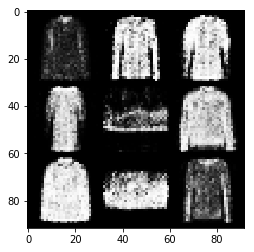

Epoch:  46
g_loss: 0.946363091468811 d_loss: 1.1071969270706177


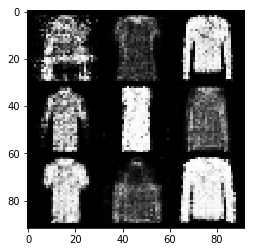

Epoch:  47
g_loss: 1.0404313802719116 d_loss: 1.0944931507110596


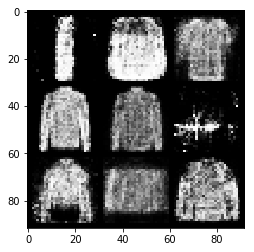

Epoch:  48
g_loss: 1.2277138233184814 d_loss: 1.2194297313690186


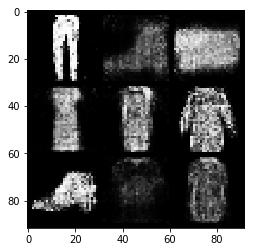

Epoch:  49
g_loss: 0.9515284299850464 d_loss: 1.101110577583313


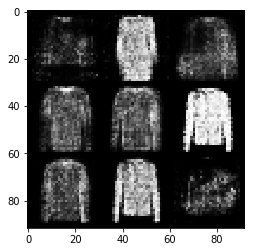

Epoch:  50
g_loss: 1.0269705057144165 d_loss: 1.050857424736023


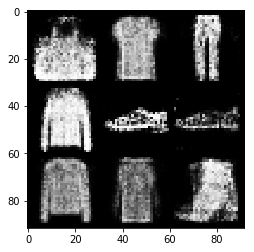

In [7]:
num_epochs = 50
for epoch in range(num_epochs):
    print("Epoch: ", epoch+1)
    for i, images in enumerate(data_loader):
        real_images = Variable(images).to(device)
        batch_size = real_images.size(0)
        generator.train()
        d_loss = discriminator_step(batch_size, real_images)
        g_loss = generator_step(batch_size)

    print("g_loss: {} d_loss: {}".format(g_loss, d_loss))
    generator.eval()
    z = Variable(torch.randn(9, 100)).to(device)
    sample_images = generator(z)
    sample_images = sample_images.view(sample_images.size(0), 28, 28).unsqueeze(1).data.cpu()
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()
            

In [8]:
class FashionMNIST_withlabel(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        fashion_df = pd.read_csv('../input/fashion-mnist_train.csv')
        self.labels = fashion_df.label.values
        self.images = fashion_df.iloc[:, 1:].values.astype('uint8').reshape(-1, 28, 28)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        label = self.labels[idx]
        img = Image.fromarray(self.images[idx])
        
        if self.transform:
            img = self.transform(img)

        return img, label

In [9]:
dataset = FashionMNIST_withlabel()
dataset[0][0]

In [10]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
dataset = FashionMNIST_withlabel(transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.label_emb = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(110, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    
    def forward(self, z, labels):
        z = z.view(z.size(0), 100)
        c = self.label_emb(labels)
        x = torch.cat([z, c], 1)
        out = self.model(x)
        return out.view(x.size(0), 28, 28)
    
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.label_emb = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(794, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x, labels):
        x = x.view(x.size(0), 784)
        c = self.label_emb(labels)
        x = torch.cat([x, c], 1)
        out = self.model(x)
        return out.squeeze()

In [12]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [13]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)

In [14]:
def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):
    g_optimizer.zero_grad()
    z = Variable(torch.randn(batch_size, 100)).to(device)
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).to(device)
    fake_images = generator(z, fake_labels)
    validity = discriminator(fake_images, fake_labels)
    g_loss = criterion(validity, Variable(torch.ones(batch_size)).to(device))
    g_loss.backward()
    g_optimizer.step()
    return g_loss.data[0]

def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
    d_optimizer.zero_grad()

    # train with real images
    real_validity = discriminator(real_images, labels)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).to(device))
    
    # train with fake images
    z = Variable(torch.randn(batch_size, 100)).cuda()
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).to(device)
    fake_images = generator(z, fake_labels)
    fake_validity = discriminator(fake_images, fake_labels)
    fake_loss = criterion(fake_validity, Variable(torch.zeros(batch_size)).to(device))
    
    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss.data[0]

Starting epoch 0...


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.


g_loss: 3.1719818115234375, d_loss: 0.7686938047409058


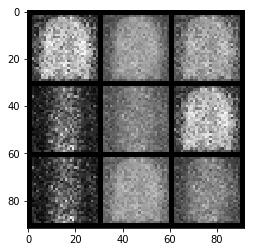

Starting epoch 1...
g_loss: 3.293555736541748, d_loss: 0.2936161160469055


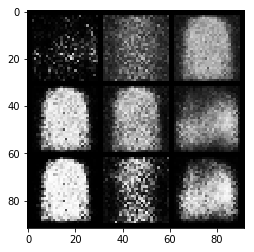

Starting epoch 2...
g_loss: 3.2835445404052734, d_loss: 0.3280230760574341


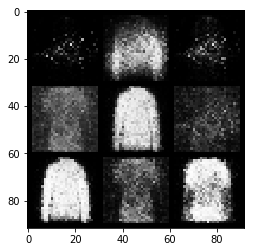

Starting epoch 3...
g_loss: 3.025297164916992, d_loss: 0.599830150604248


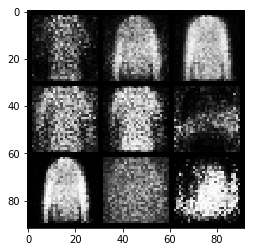

Starting epoch 4...
g_loss: 2.705867290496826, d_loss: 0.5498653650283813


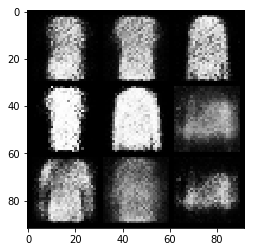

Starting epoch 5...
g_loss: 3.631683588027954, d_loss: 0.5922935009002686


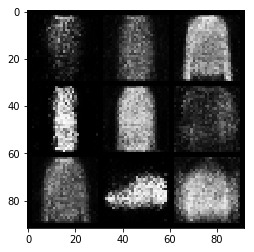

Starting epoch 6...
g_loss: 1.32057785987854, d_loss: 1.1063108444213867


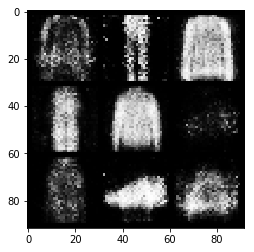

Starting epoch 7...
g_loss: 2.616511344909668, d_loss: 0.7926918268203735


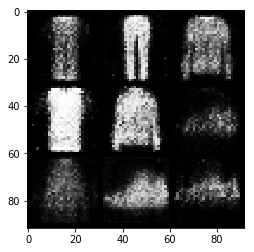

Starting epoch 8...
g_loss: 2.0039916038513184, d_loss: 0.7448384761810303


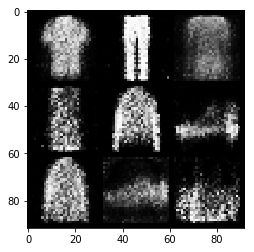

Starting epoch 9...
g_loss: 2.3571507930755615, d_loss: 0.845771074295044


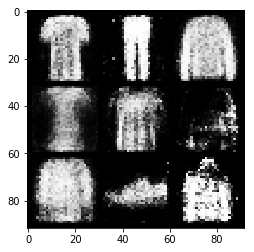

Starting epoch 10...
g_loss: 1.4703056812286377, d_loss: 0.8891459107398987


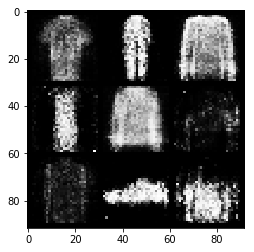

Starting epoch 11...
g_loss: 1.5751545429229736, d_loss: 0.9618220925331116


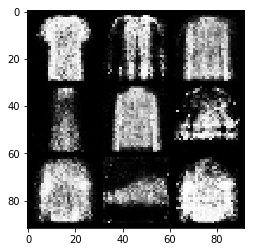

Starting epoch 12...
g_loss: 2.0175721645355225, d_loss: 0.6231856346130371


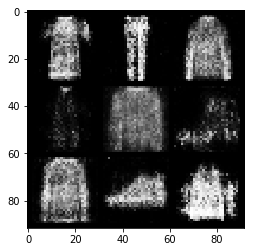

Starting epoch 13...
g_loss: 1.6337257623672485, d_loss: 1.0040583610534668


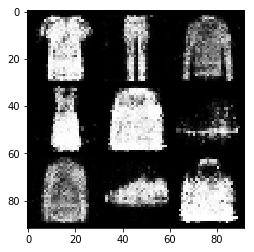

Starting epoch 14...
g_loss: 1.297853946685791, d_loss: 1.0487651824951172


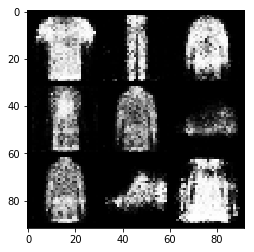

Starting epoch 15...
g_loss: 1.7304030656814575, d_loss: 1.3512344360351562


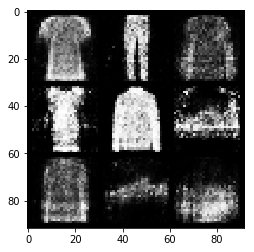

Starting epoch 16...
g_loss: 1.7342438697814941, d_loss: 0.6768280267715454


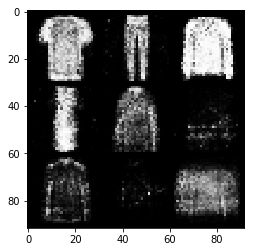

Starting epoch 17...
g_loss: 1.2197293043136597, d_loss: 0.7773691415786743


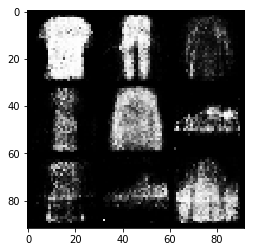

Starting epoch 18...
g_loss: 1.4384422302246094, d_loss: 0.9911123514175415


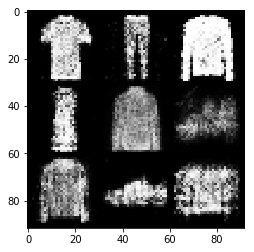

Starting epoch 19...
g_loss: 1.3401288986206055, d_loss: 0.9459271430969238


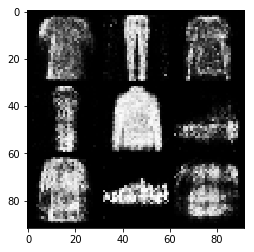

Starting epoch 20...
g_loss: 1.6971640586853027, d_loss: 1.0090632438659668


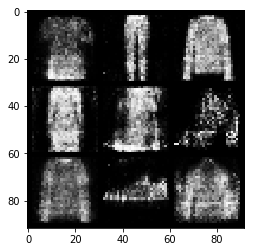

Starting epoch 21...
g_loss: 1.2500429153442383, d_loss: 1.159384846687317


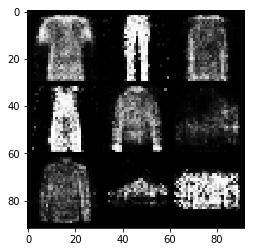

Starting epoch 22...
g_loss: 1.3076858520507812, d_loss: 0.9687546491622925


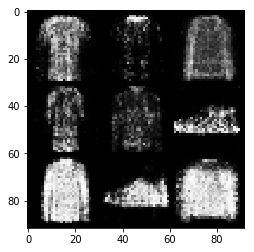

Starting epoch 23...
g_loss: 1.2585026025772095, d_loss: 0.9622567892074585


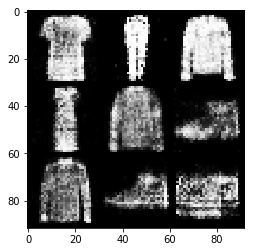

Starting epoch 24...
g_loss: 1.3501019477844238, d_loss: 1.1506106853485107


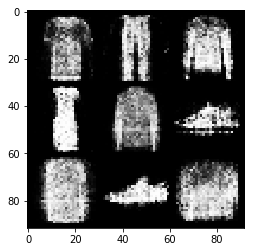

Starting epoch 25...
g_loss: 0.9739611744880676, d_loss: 1.0261752605438232


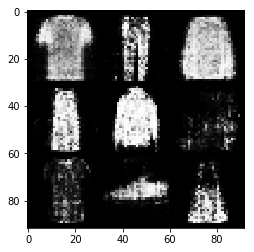

Starting epoch 26...
g_loss: 1.1247990131378174, d_loss: 1.0448881387710571


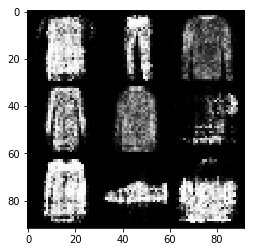

Starting epoch 27...
g_loss: 1.138293981552124, d_loss: 0.911141037940979


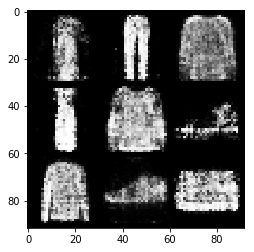

Starting epoch 28...
g_loss: 1.1369606256484985, d_loss: 1.0806347131729126


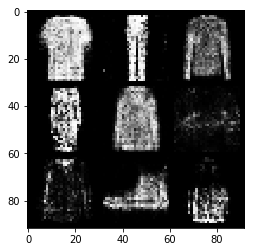

Starting epoch 29...
g_loss: 1.259458065032959, d_loss: 0.952692449092865


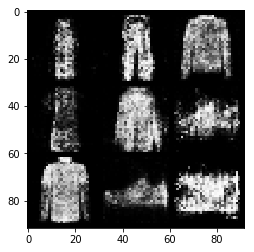

Starting epoch 30...
g_loss: 1.1178910732269287, d_loss: 0.9956985116004944


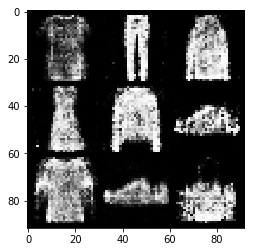

Starting epoch 31...
g_loss: 1.0269381999969482, d_loss: 1.0312856435775757


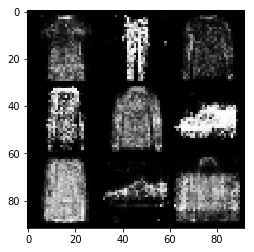

Starting epoch 32...
g_loss: 1.1499526500701904, d_loss: 1.0454599857330322


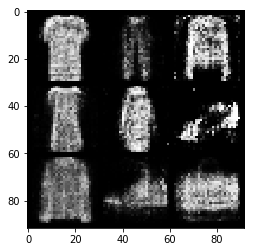

Starting epoch 33...
g_loss: 1.2840691804885864, d_loss: 1.1887189149856567


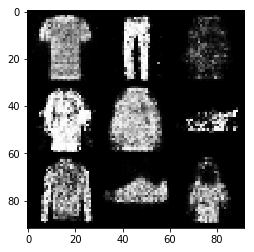

Starting epoch 34...
g_loss: 0.8111435174942017, d_loss: 1.2370667457580566


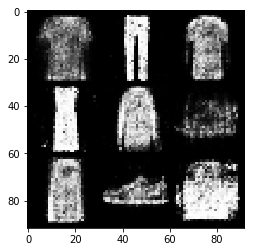

Starting epoch 35...
g_loss: 0.865331768989563, d_loss: 0.8966362476348877


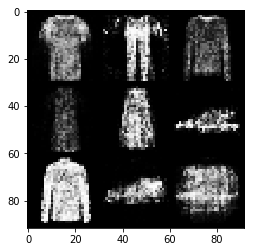

Starting epoch 36...
g_loss: 1.0919113159179688, d_loss: 1.053615927696228


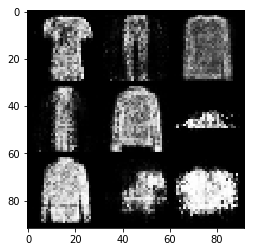

Starting epoch 37...
g_loss: 1.1320563554763794, d_loss: 1.2454445362091064


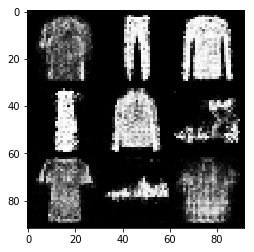

Starting epoch 38...
g_loss: 1.1167699098587036, d_loss: 1.221690058708191


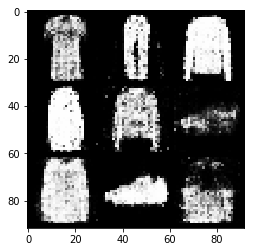

Starting epoch 39...
g_loss: 1.0530378818511963, d_loss: 1.1894757747650146


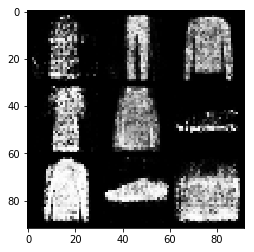

Starting epoch 40...
g_loss: 1.1025855541229248, d_loss: 1.0805139541625977


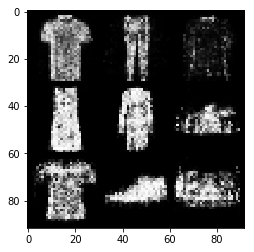

Starting epoch 41...
g_loss: 0.9186707139015198, d_loss: 1.1153124570846558


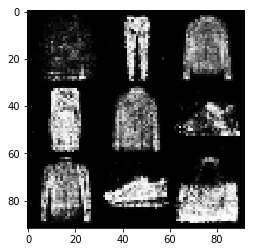

Starting epoch 42...
g_loss: 0.8985610008239746, d_loss: 1.0778579711914062


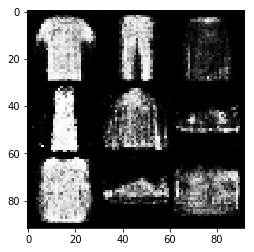

Starting epoch 43...
g_loss: 1.1172866821289062, d_loss: 1.1085284948349


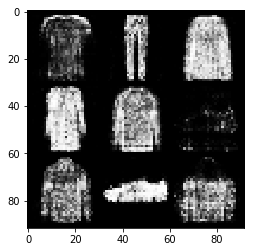

Starting epoch 44...
g_loss: 0.8328278064727783, d_loss: 1.2259738445281982


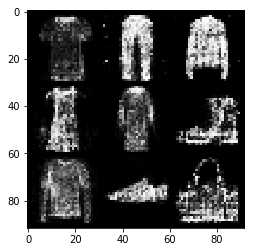

Starting epoch 45...
g_loss: 0.9582918286323547, d_loss: 1.164499044418335


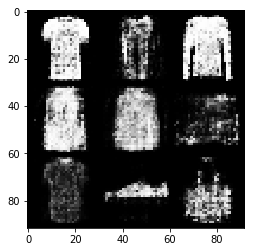

Starting epoch 46...
g_loss: 1.1241679191589355, d_loss: 1.1918996572494507


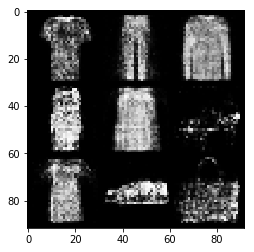

Starting epoch 47...
g_loss: 0.8873374462127686, d_loss: 1.2582101821899414


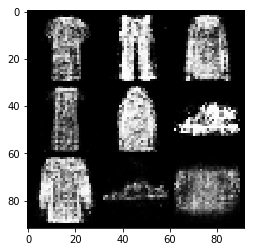

Starting epoch 48...
g_loss: 0.9810632467269897, d_loss: 1.2912797927856445


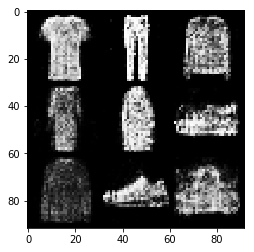

Starting epoch 49...
g_loss: 0.7796002626419067, d_loss: 1.146688461303711


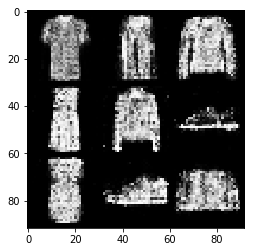

In [15]:
num_epochs = 50
n_critic = 5
display_step = 300
for epoch in range(num_epochs):
    print('Starting epoch {}...'.format(epoch))
    for i, (images, labels) in enumerate(data_loader):
        real_images = Variable(images).to(device)
        labels = Variable(labels).to(device)
        generator.train()
        batch_size = real_images.size(0)
        d_loss = discriminator_train_step(len(real_images), discriminator,
                                          generator, d_optimizer, criterion,
                                          real_images, labels)
        

        g_loss = generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion)

    generator.eval()
    print('g_loss: {}, d_loss: {}'.format(g_loss, d_loss))
    z = Variable(torch.randn(9, 100)).to(device)
    labels = Variable(torch.LongTensor(np.arange(9))).to(device)
    sample_images = generator(z, labels).unsqueeze(1).data.cpu()
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()

## Results

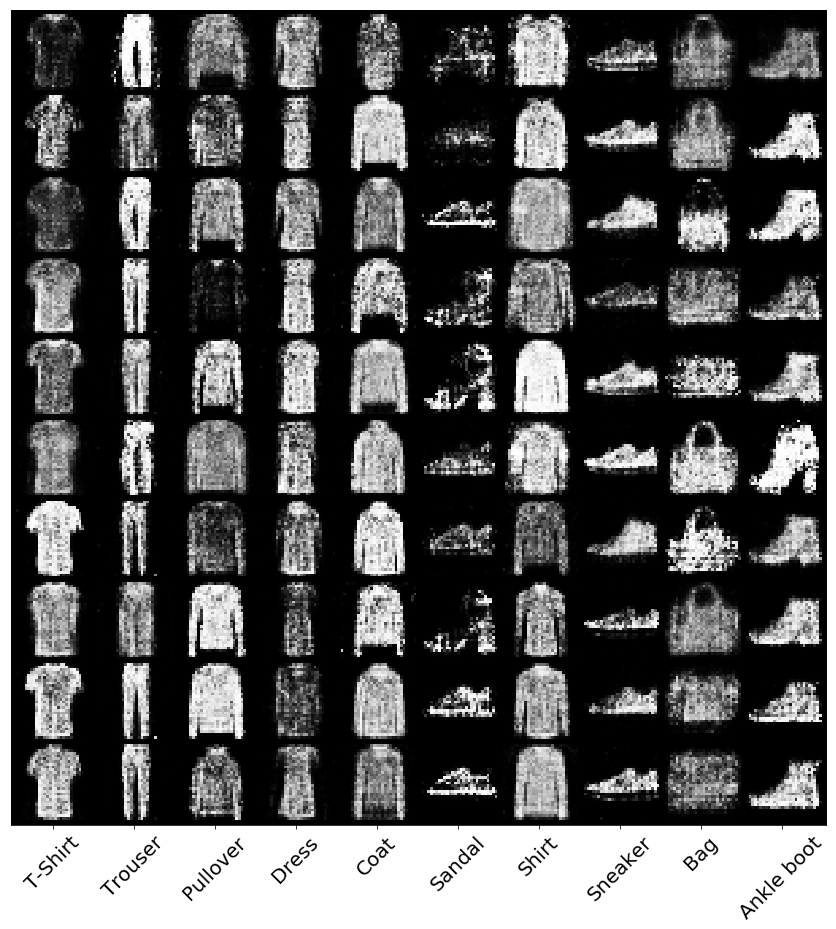

In [17]:
z = Variable(torch.randn(100, 100)).to(device)
labels = Variable(torch.LongTensor([i for _ in range(10) for i in range(10)])).to(device)
sample_images = generator(z, labels).unsqueeze(1).data.cpu()
grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).numpy()
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid)
_ = plt.yticks([])
_ = plt.xticks(np.arange(15, 300, 30), ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45, fontsize=20)
